In [22]:
!pip install tensorflow

In [23]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [24]:
actions = ['rabbit', 'butterfly', 'fox']

data = np.concatenate([
    np.load('dataset/seq_rabbit_1669025465.npy'),
    np.load('dataset/seq_butterfly_1669025465.npy'),
    np.load('dataset/seq_fox_1669025465.npy')
], axis=0)

data.shape

(1500, 30, 100)

In [25]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(1500, 30, 99)
(1500,)


In [26]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1500, 3)

In [27]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1350, 30, 99) (1350, 3)
(150, 30, 99) (150, 3)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                41984     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
42/43 [============================>.] - ETA: 0s - loss: 6.9042 - acc: 0.7589
Epoch 1: val_acc improved from -inf to 0.86000, saving model to models\model.h5
43/43 [==============================] - 7s 54ms/step - loss: 6.8861 - acc: 0.7593 - val_loss: 2.8770 - val_acc: 0.8600 - lr: 0.0010
Epoch 2/200
42/43 [============================>.] - ETA: 0s - loss: 8.7340 - acc: 0.7277
Epoch 2: val_acc did not improve from 0.86000
43/43 [==============================] - 1s 33ms/step - loss: 8.6952 - acc: 0.7289 - val_loss: 9.8690 - val_acc: 0.7533 - lr: 0.0010
Epoch 3/200
42/43 [============================>.] - ETA: 0s - loss: 7.4294 - acc: 0.7857
Epoch 3: val_acc did not improve from 0.86000
43/43 [==============================] - 1s 32ms/step - loss: 7.3964 - acc: 0.7867 - val_loss: 13.7479 - val_acc: 0.8000 - lr: 0.0010
Epoch 4/200
43/43 [==============================] - ETA: 0s - loss: 21.1083 - acc: 0.7911
Epoch 4: val_acc did not improve from 0.86000
43/43 [==============

Epoch 31/200
43/43 [==============================] - ETA: 0s - loss: 3.8656 - acc: 0.8630
Epoch 31: val_acc did not improve from 0.95333
43/43 [==============================] - 1s 32ms/step - loss: 3.8656 - acc: 0.8630 - val_loss: 7.2005 - val_acc: 0.8600 - lr: 0.0010
Epoch 32/200
43/43 [==============================] - ETA: 0s - loss: 27.6625 - acc: 0.6333
Epoch 32: val_acc did not improve from 0.95333
43/43 [==============================] - 2s 41ms/step - loss: 27.6625 - acc: 0.6333 - val_loss: 67.3802 - val_acc: 0.5000 - lr: 0.0010
Epoch 33/200
42/43 [============================>.] - ETA: 0s - loss: 17.5094 - acc: 0.5766
Epoch 33: val_acc did not improve from 0.95333
43/43 [==============================] - 1s 34ms/step - loss: 17.5001 - acc: 0.5770 - val_loss: 5.9662 - val_acc: 0.7400 - lr: 0.0010
Epoch 34/200
42/43 [============================>.] - ETA: 0s - loss: 6.9998 - acc: 0.7418
Epoch 34: val_acc did not improve from 0.95333
43/43 [==============================] - 1s 

Epoch 61/200
42/43 [============================>.] - ETA: 0s - loss: 1.1811 - acc: 0.9397
Epoch 61: val_acc did not improve from 0.98000
43/43 [==============================] - 1s 30ms/step - loss: 1.1758 - acc: 0.9400 - val_loss: 0.5636 - val_acc: 0.9600 - lr: 0.0010
Epoch 62/200
42/43 [============================>.] - ETA: 0s - loss: 0.5686 - acc: 0.9628
Epoch 62: val_acc did not improve from 0.98000
43/43 [==============================] - 1s 32ms/step - loss: 0.5661 - acc: 0.9630 - val_loss: 0.2702 - val_acc: 0.9667 - lr: 0.0010
Epoch 63/200
42/43 [============================>.] - ETA: 0s - loss: 0.3903 - acc: 0.9710
Epoch 63: val_acc improved from 0.98000 to 0.98667, saving model to models\model.h5
43/43 [==============================] - 1s 34ms/step - loss: 0.3888 - acc: 0.9711 - val_loss: 0.0448 - val_acc: 0.9867 - lr: 0.0010
Epoch 64/200
41/43 [===========================>..] - ETA: 0s - loss: 0.3356 - acc: 0.9748
Epoch 64: val_acc improved from 0.98667 to 1.00000, saving 

Epoch 91/200
41/43 [===========================>..] - ETA: 0s - loss: 0.4380 - acc: 0.9649
Epoch 91: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 29ms/step - loss: 0.4414 - acc: 0.9630 - val_loss: 0.8902 - val_acc: 0.9467 - lr: 0.0010
Epoch 92/200
42/43 [============================>.] - ETA: 0s - loss: 0.8839 - acc: 0.9412
Epoch 92: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 27ms/step - loss: 0.8800 - acc: 0.9415 - val_loss: 1.4317 - val_acc: 0.9333 - lr: 0.0010
Epoch 93/200
42/43 [============================>.] - ETA: 0s - loss: 2.2451 - acc: 0.9115
Epoch 93: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 29ms/step - loss: 2.2355 - acc: 0.9119 - val_loss: 0.1282 - val_acc: 0.9733 - lr: 0.0010
Epoch 94/200
41/43 [===========================>..] - ETA: 0s - loss: 0.3930 - acc: 0.9741
Epoch 94: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 30ms/

Epoch 121/200
41/43 [===========================>..] - ETA: 0s - loss: 0.0927 - acc: 0.9939
Epoch 121: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 29ms/step - loss: 0.0901 - acc: 0.9941 - val_loss: 6.2683e-06 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 122/200
41/43 [===========================>..] - ETA: 0s - loss: 0.1195 - acc: 0.9931
Epoch 122: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 29ms/step - loss: 0.1162 - acc: 0.9933 - val_loss: 0.0194 - val_acc: 0.9933 - lr: 5.0000e-04
Epoch 123/200
42/43 [============================>.] - ETA: 0s - loss: 0.0635 - acc: 0.9970
Epoch 123: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 29ms/step - loss: 0.0655 - acc: 0.9963 - val_loss: 5.6240e-06 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 124/200
41/43 [===========================>..] - ETA: 0s - loss: 0.0867 - acc: 0.9962
Epoch 124: val_acc did not improve from 1.00000
43/43 [==============

Epoch 150/200
41/43 [===========================>..] - ETA: 0s - loss: 0.0119 - acc: 0.9970
Epoch 150: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 29ms/step - loss: 0.0116 - acc: 0.9970 - val_loss: 8.6625e-08 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 151/200
42/43 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 0.9985
Epoch 151: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 29ms/step - loss: 0.0022 - acc: 0.9985 - val_loss: 8.4831e-06 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 152/200
41/43 [===========================>..] - ETA: 0s - loss: 1.6511e-05 - acc: 1.0000
Epoch 152: val_acc did not improve from 1.00000
43/43 [==============================] - 2s 35ms/step - loss: 1.6047e-05 - acc: 1.0000 - val_loss: 1.0376e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 153/200
43/43 [==============================] - ETA: 0s - loss: 1.4344e-05 - acc: 1.0000
Epoch 153: val_acc did not improve from 1.00000
43/43

43/43 [==============================] - 1s 29ms/step - loss: 8.6146e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 179/200
42/43 [============================>.] - ETA: 0s - loss: 8.5227e-06 - acc: 1.0000
Epoch 179: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 29ms/step - loss: 8.5131e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 180/200
42/43 [============================>.] - ETA: 0s - loss: 8.5659e-06 - acc: 1.0000
Epoch 180: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 30ms/step - loss: 8.5278e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 181/200
41/43 [===========================>..] - ETA: 0s - loss: 8.6966e-06 - acc: 1.0000
Epoch 181: val_acc did not improve from 1.00000
43/43 [==============================] - 1s 31ms/step - loss: 8.4518e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000 - lr: 2.5000e-04
Epoc

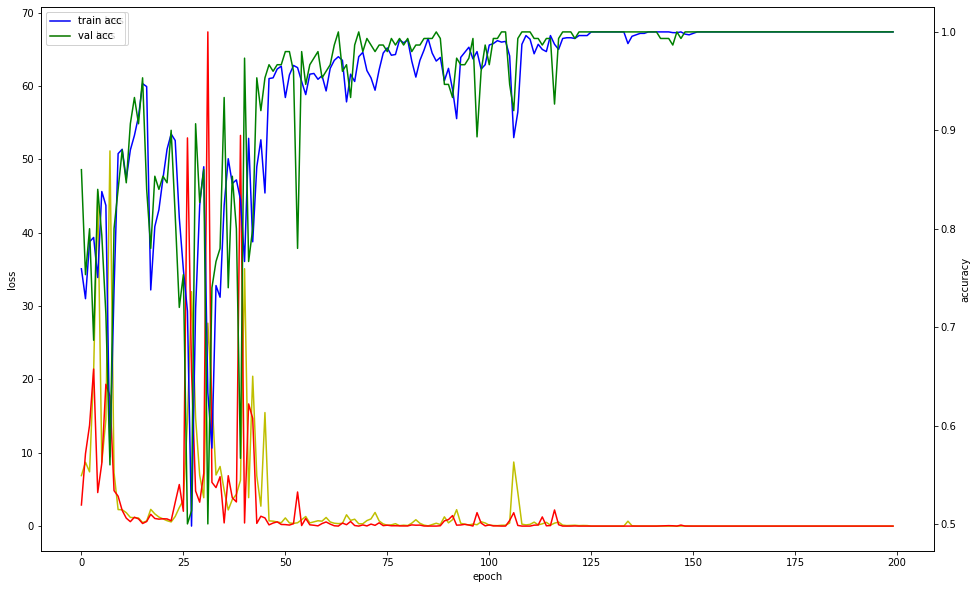

In [30]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [31]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

5/5 [==============================] - 0s 12ms/step


array([[[104,   0],
        [  0,  46]],

       [[107,   0],
        [  0,  43]],

       [[ 89,   0],
        [  0,  61]]], dtype=int64)